# Fashion Class Classification

The fashion dataset consists of 70,000 images divided into 60,000 training and 10,000 test samples. The dataset consists of 28x28 grayscale images, associated with a label from 10 classes. 

The 10 classes are as follows:
- 0 => T-shirt/top
- 1 => Trouser
- 2 => Pullover
- 3 => Dress
- 4 => Coat
- 5 => Sandal
- 6 => Shirt
- 7 => Sneaker
- 8 => Bag
- 9 => Ankle boot

Each image is 28 pixels in height and 28 pixels in width, for a total of 784. Each pixel has a single pixel-value associated with it, indicating the lightness or darkness of that pixel, with higher numbers meaning lighter. This pixel-value is an integer between 0 and 255.

**Amazon Echo Look:** https://www.youtube.com/watch?v=9X_fP4pPWPw

**Data Source:** https://www.kaggle.com/manjurulhoque/fashion-class-classification

**Artificial Neural Network Learning Resource:** https://github.com/MohitGoel92/Will-the-customer-leave-the-bank-

**Convolution Neural Networks Learning Resource:** https://github.com/MohitGoel92/Is-it-a-cat-or-a-dog

**Image Kernels Explanatory Resource:** https://setosa.io/ev/image-kernels/

# Importing the libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random

# Importing the dataset

In [2]:
ds_train = pd.read_csv('Fashion_train.csv')
ds_test = pd.read_csv('Fashion_test.csv')

# Visualising the dataset

In [3]:
# We observe the images being represented by 28 x 28 pixels by flattening the image, 
# therefore each row representing an image.
ds_train.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,...,0,0,0,30,43,0,0,0,0,0
3,0,0,0,0,1,2,0,0,0,0,...,3,0,0,0,0,1,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
ds_train.shape

(60000, 785)

In [5]:
ds_test.shape

(10000, 785)

In [6]:
# The below is now referred to as our training dataset.

training = np.array(ds_train, dtype = 'float32')

In [7]:
# The below is now referred to as our test dataset.

test = np.array(ds_test, dtype = 'float32')

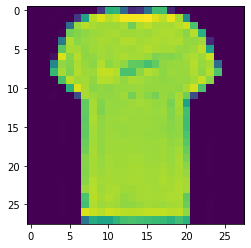

In [8]:
# Observing an image: Using image show
plt.imshow(training[10, 1:].reshape(28,28))

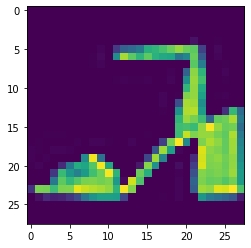

In [9]:
plt.imshow(training[60, 1:].reshape(28,28))

The 10 classes are as follows:
- 0 => T-shirt/top
- 1 => Trouser
- 2 => Pullover
- 3 => Dress
- 4 => Coat
- 5 => Sandal
- 6 => Shirt
- 7 => Sneaker
- 8 => Bag
- 9 => Ankle boot

This is a 3.0


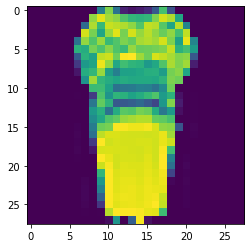

In [10]:
i = random.randint(1, 60000)
plt.imshow(training[i, 1:].reshape(28,28))
print('This is a', 
      training[i,0])

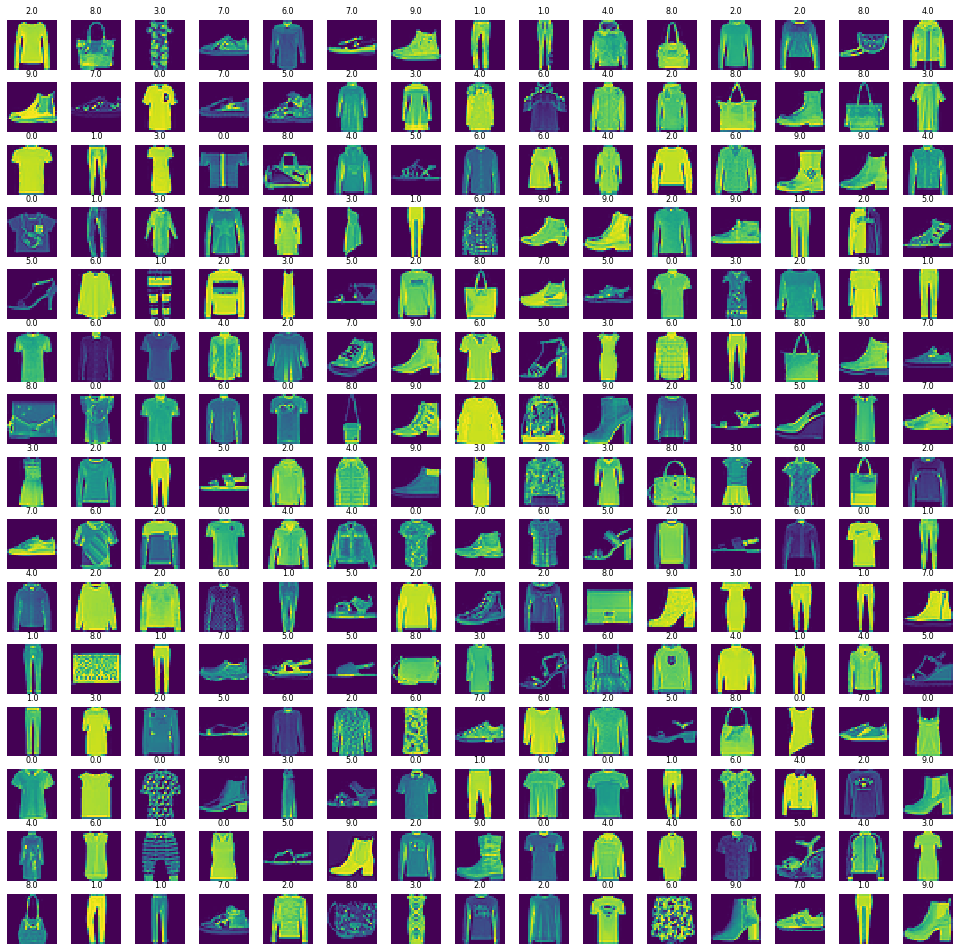

In [11]:
# Let's view more images in a grid format
# Define the dimensions of the plot grid

W_grid = 15
L_grid = 15

# fig, axes = plt.subplots(L_grid, W_grid)
# subplot return the figure object and axes object
# we can use the axes object to plot specific figures at various locations

fig, axes = plt.subplots(L_grid, W_grid, figsize = (17,17))

axes = axes.ravel() # Flatten the 15 x 15 matrix into 225 array

n_training = len(training) # Length of the training dataset

# Select a random number from 0 to n_training
for i in np.arange(0, W_grid * L_grid): # create evenly spaces variables 

    # Select a random number
    index = np.random.randint(0, n_training)
    # Read and display an image with the selected index    
    axes[i].imshow(training[index,1:].reshape((28,28)))
    axes[i].set_title(training[index,0], fontsize = 8)
    axes[i].axis('off')

# Setting the space between each image
plt.subplots_adjust(hspace=0.25)

# Splitting the dataset into the training set and test set

In [12]:
# We are dividing by 255 in order to normalise the data. This is similar to
# performing Feature Scaling

X_train = training[:, 1:]/255
y_train = training[:, 0]

In [13]:
X_test = test[:, 1:]/255
y_test = test[:, 0]

In [14]:
from sklearn.model_selection import train_test_split
X_train, X_validate, y_train, y_validate = train_test_split(X_train, y_train, test_size = 0.2, random_state = 12345)

# Reshaping the data

In [15]:
# Reshaping the arrays into an image format so we are able to feed them into our CNN.

X_train = X_train.reshape(X_train.shape[0], *(28,28,1))
X_test = X_test.reshape(X_test.shape[0], *(28,28,1))
X_validate = X_validate.reshape(X_validate.shape[0], *(28,28,1))

In [16]:
# The below is telling us that the images are 28x28 and are grey scale.

X_train.shape

(48000, 28, 28, 1)

In [17]:
X_test.shape

(10000, 28, 28, 1)

In [18]:
X_validate.shape

(12000, 28, 28, 1)

# Building the CNN

In [20]:
# Sequential - Initialise the ANN as it is a sequence of layers
# Convolution 2D - The Convolution step: Adding convolution layers
# Maxpooling 2D - Pooling the layers
# Flatten - The Flattening step, where we convert the pooled feature map to input into the ANN
# Dense - Add layers to the ANN
# Dropout - To drop out units/nodes of our Neural Network is deemed unnecessary.
# Dropout reduces overfitting as it makes a more of a 'general' fit.

import keras
from keras.models import Sequential
from keras.layers import Convolution2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense
from keras.layers import Dropout
from keras.optimizers import Adam
from keras.callbacks import TensorBoard

In [22]:
# Initialising the CNN

cnn = Sequential()

In [24]:
# Step 1 - Convolution
# We have 32 feature detectors (feature maps) of dimension 3X3
# input_shape: We want 28X28 pixels (Note: 128X128 and 256X256 will take too long), 1 is the number of channels as we want a colour map (1 channel B&W Image)
# Activation function is relu (ReLU: Rectified Linear Units) to avoid negative pixels for non-linearity

cnn.add(Convolution2D(32, (3, 3), input_shape = (28,28,1), activation = 'relu'))

Instructions for updating:
Colocations handled automatically by placer.


In [25]:
# Step 2 - Max Pooling
# Reducing the size of the feature map by dividing it by 2

cnn.add(MaxPooling2D(pool_size = (2,2)))

In [26]:
# Step 3 - Flattening

cnn.add(Flatten())

In [27]:
# Step 4 - Full Connection
# Units = 128 is from trial and error, it is seen to be a good number for neural networks. It is usually a power of 2
# Units = 10 as we have 10 possible classes (outputs) to match/predict each image to.

cnn.add(Dense(units = 128, activation = 'relu'))
cnn.add(Dense(units = 10, activation = 'sigmoid'))

In [29]:
# Compiling the CNN
# If we had a single output (e.g. Cat or Dog), our loss = 'binary_crossentropy'

cnn.compile(optimizer = Adam(lr=0.001), loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])

In [30]:
# The number of times the data is presented to the CNN which is also the number of times the weights are updated.

epochs = 50

# Fitting the CNN to the dataset

In [31]:
# Note: The validation data is the the X_test and y_test within the training set.
# We use this data to set for accuracy.
# Once we exucte the below code, the epochs will run and we will notice the 'loss' reducing 
# while the accuracy ('val_accuracy') increases.

cnn.fit(X_train,
        y_train,
        batch_size = 512,
        nb_epoch = epochs,
        verbose = 1,
        validation_data = (X_validate, y_validate))

/Users/mohitgoel/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  if __name__ == '__main__':


Train on 48000 samples, validate on 12000 samples
Epoch 1/50
48000/48000 [==============================] - 21s 441us/step - loss: 0.7048 - accuracy: 0.7594 - val_loss: 0.4376 - val_accuracy: 0.8467
Epoch 2/50
48000/48000 [==============================] - 21s 433us/step - loss: 0.4116 - accuracy: 0.8556 - val_loss: 0.3908 - val_accuracy: 0.8621
Epoch 3/50
48000/48000 [==============================] - 22s 454us/step - loss: 0.3552 - accuracy: 0.8762 - val_loss: 0.3478 - val_accuracy: 0.8756
Epoch 4/50
48000/48000 [==============================] - 22s 451us/step - loss: 0.3259 - accuracy: 0.8847 - val_loss: 0.3200 - val_accuracy: 0.8898
Epoch 5/50
48000/48000 [==============================] - 18s 379us/step - loss: 0.3001 - accuracy: 0.8955 - val_loss: 0.2987 - val_accuracy: 0.8955
Epoch 6/50
48000/48000 [==============================] - 18s 370us/step - loss: 0.2869 - accuracy: 0.8983 - val_loss: 0.3020 - val_accuracy: 0.8929
Epoch 7/50
48000/48000 [==============================] 

# Model Evaluation

In [33]:
evaluation = cnn.evaluate(X_test, y_test)
print('Test Accuracy : {:.3f}'.format(evaluation[1]))

10000/10000 [==============================] - 2s 153us/step
Test Accuracy : 0.919


In [34]:
y_pred = cnn.predict_classes(X_test)

In [35]:
y_pred

array([0, 1, 2, ..., 8, 8, 1])

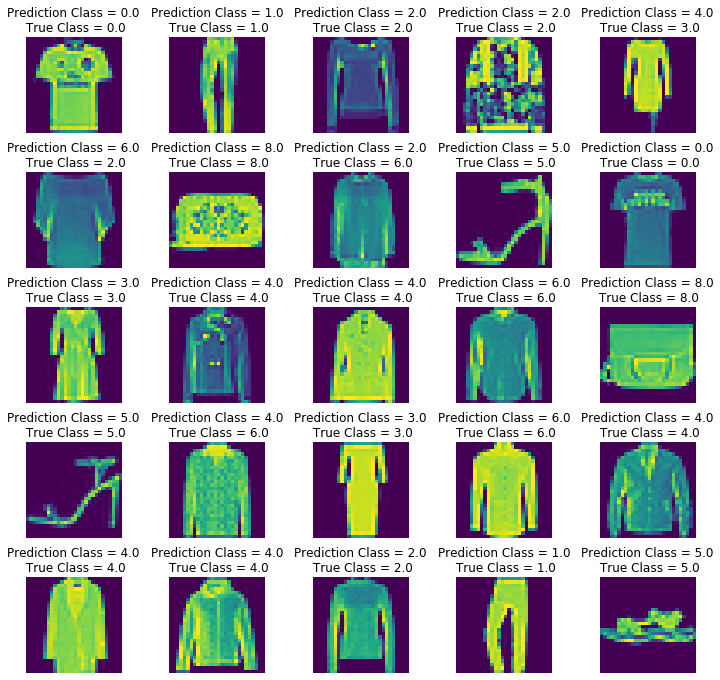

In [37]:
L = 5
W = 5
fig, axes = plt.subplots(L, W, figsize = (12,12))
axes = axes.ravel() # Flatten our axis

for i in np.arange(0, L * W):  
    axes[i].imshow(X_test[i].reshape(28,28))
    axes[i].set_title("Prediction Class = {:0.1f}\n True Class = {:0.1f}".format(y_pred[i], y_test[i]))
    axes[i].axis('off')

plt.subplots_adjust(wspace=0.5)

In [39]:
from sklearn.metrics import confusion_matrix, classification_report
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[866   0  11  13   1   1 100   0   8   0]
 [  3 986   0   8   1   0   2   0   0   0]
 [ 18   1 845  14  59   0  63   0   0   0]
 [ 15   9   5 928  21   0  20   0   2   0]
 [  2   1  32  26 886   0  51   0   2   0]
 [  1   2   0   0   0 971   0  17   1   8]
 [ 87   1  37  37  42   0 793   0   3   0]
 [  0   0   0   0   0   5   0 961   0  34]
 [  5   0   3   3   2   2   7   2 976   0]
 [  0   0   0   0   0   1   0  26   0 973]]


In [41]:
# We observe class 1,5,7,8 and 9 having high accuracy.

no_classes = 10
target_names = ['Class {}'.format(i) for i in range(no_classes)]
print(classification_report(y_test, y_pred, target_names = target_names))

              precision    recall  f1-score   support

     Class 0       0.87      0.87      0.87      1000
     Class 1       0.99      0.99      0.99      1000
     Class 2       0.91      0.84      0.87      1000
     Class 3       0.90      0.93      0.91      1000
     Class 4       0.88      0.89      0.88      1000
     Class 5       0.99      0.97      0.98      1000
     Class 6       0.77      0.79      0.78      1000
     Class 7       0.96      0.96      0.96      1000
     Class 8       0.98      0.98      0.98      1000
     Class 9       0.96      0.97      0.97      1000

    accuracy                           0.92     10000
   macro avg       0.92      0.92      0.92     10000
weighted avg       0.92      0.92      0.92     10000



**Note:** To improve the model, we may increase the filters and add a dropout.